### Step 1: Understanding the Data

In [95]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
bikesharingdata = pd.read_csv("day.csv")

In [98]:
## Checking the head of the dataset

In [99]:
bikesharingdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [100]:
bikesharingdata.shape

(730, 16)

In [101]:
bikesharingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [15]:
## Checking for null values in dataset
## There are no null values in the dataset

In [103]:
bikesharingdata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
## We can drop instant column as it is an index column

In [104]:
bikesharingdata.drop(['instant'],axis=1,inplace=True)

In [105]:
## We can drop holiday as workingday already provides us the same information

bikesharingdata.drop(['holiday'],axis=1,inplace=True)

In [106]:
bikesharingdata.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
## Cnt is our target variable. We can drop casual and registered users.

In [107]:
bikesharingdata.drop(['casual','registered'],axis=1,inplace=True)
bikesharingdata.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [108]:
# Dropping dteday as we already have year, month, weekday
bikesharingdata.drop(['dteday'],axis=1,inplace=True)

In [109]:
bikesharingdata.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
## From data, we can see that weathersit,workingday, weekday, holiday, season,yr,month are all categorical variables
## We will replace season, weekday, weathersit with appropriate values

In [110]:
bikesharingdata['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikesharingdata.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [111]:
bikesharingdata['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bikesharingdata.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,6,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,2,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,3,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [112]:
bikesharingdata['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [113]:
bikesharingdata.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [114]:
bikesharingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 62.9+ KB


In [115]:
## Converting columns like season, weathersit,mnth,weekday to categorical columns
bikesharingdata['season']=bikesharingdata['season'].astype('category')
bikesharingdata['weathersit']=bikesharingdata['weathersit'].astype('category')
bikesharingdata['mnth']=bikesharingdata['mnth'].astype('category')
bikesharingdata['weekday']=bikesharingdata['weekday'].astype('category')

In [116]:
bikesharingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   weekday     730 non-null    category
 4   workingday  730 non-null    int64   
 5   weathersit  730 non-null    category
 6   temp        730 non-null    float64 
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(3)
memory usage: 44.0 KB


### Step 2: Visualizing the Data
### Performing Pair Plots to understand the numerical variables

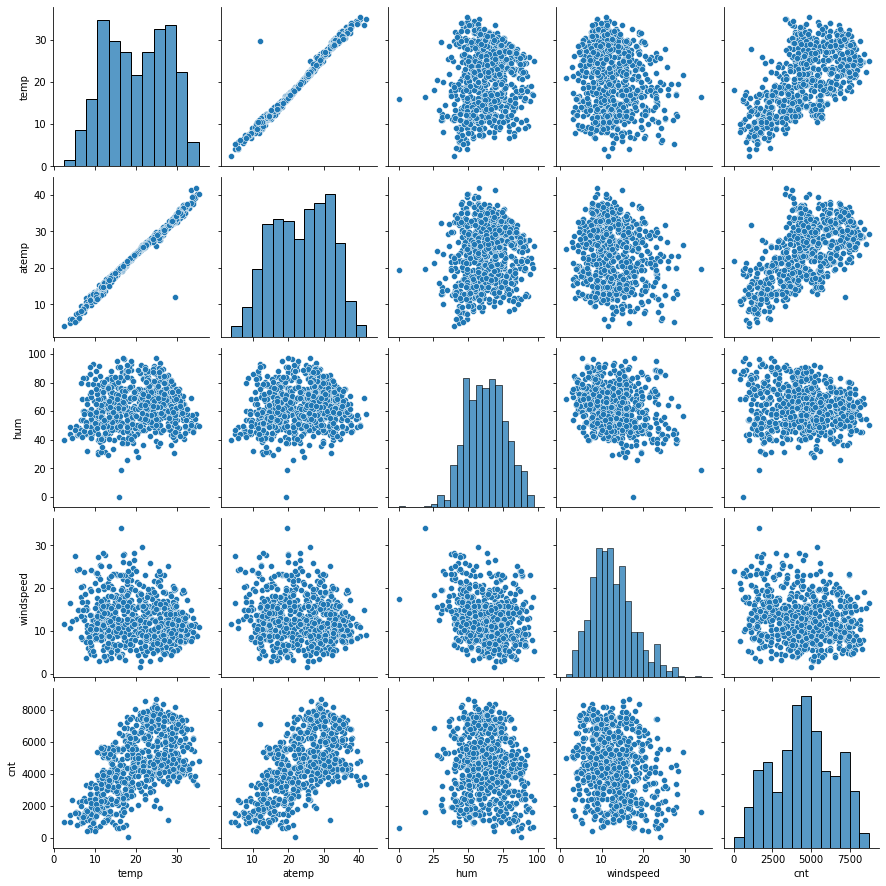

In [117]:
sns.pairplot(bikesharingdata, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### From above graphs, we can see that cnt has some relationship with temperature and feeling temperature
Temperature and Feeling Temperature seem to be related to each other. They have a high correlation of 0.99. We can check later if there is a need to drop them

In [ ]:
## Lets check the correlation between these numeric variables

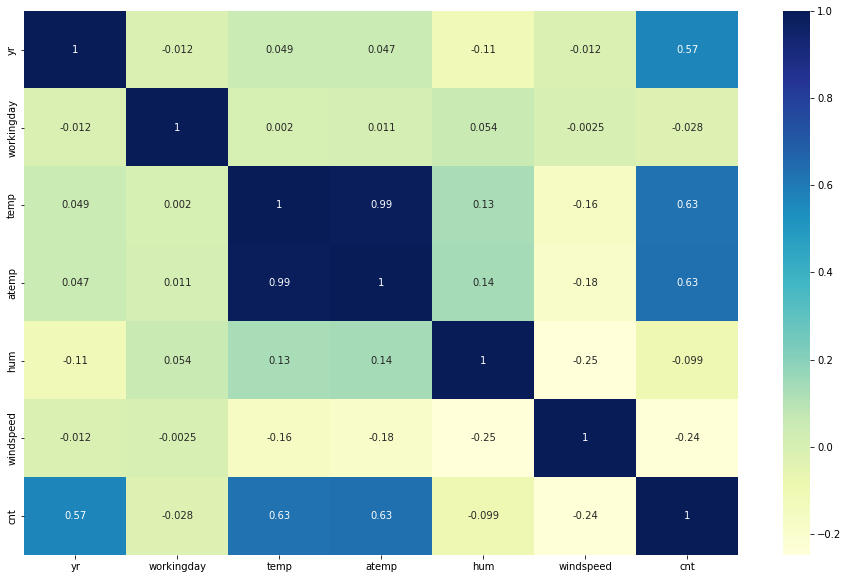

In [118]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikesharingdata.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Visualizing Categorical Variables

#### 1) Season
The bike rentals seems to be higher during the fall season.
Spring seems to be the lowest in terms of bike rentals
#### 2) Year
The bike rentals seem to be higher in 2019 as compared to 2018. However, this is too preliminary to draw any conclusions
#### 3) Month
The bike rentals seem to be higher from month 5 to month 10 (may to october)
#### 4) Weathersit
The bike rentals are higher when the weather is clear or partly cloudy; with the median higher compared to other weather situations
#### 5) Weekday
Weekday or Weekend doesnt seem to have any impact on the rentals. However, we can check later in the model
#### 6) Holiday
Holiday or Working day also doesnt seem to have any impact on the rental counts. However, we can check later in the model

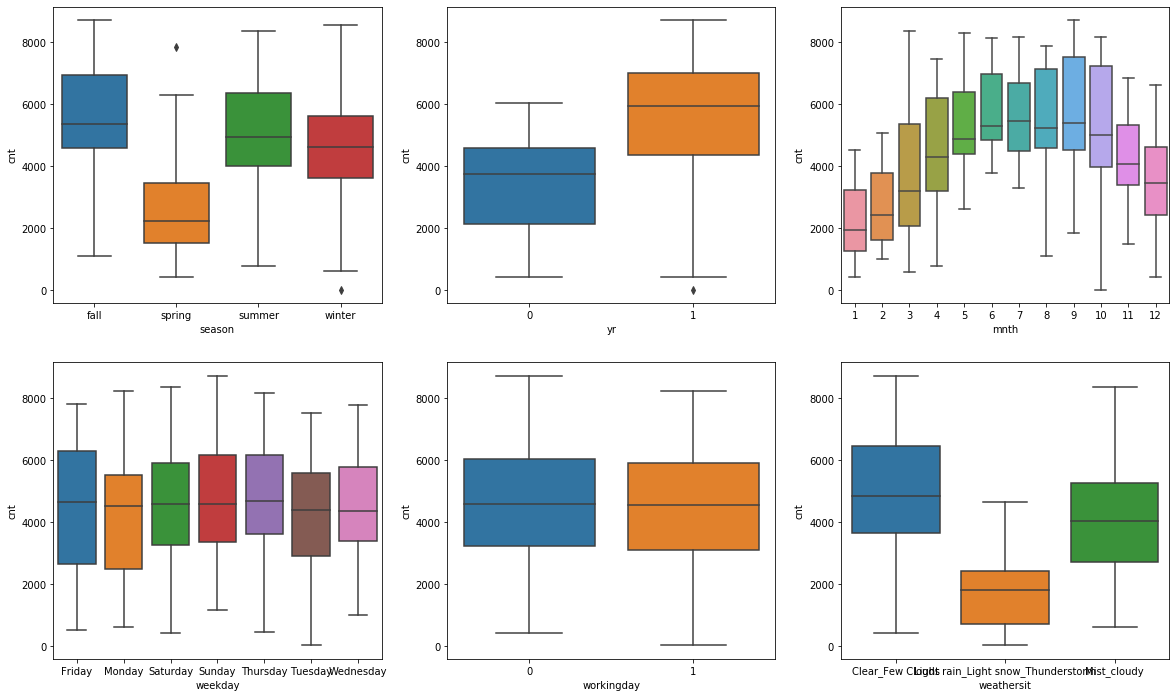

In [119]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikesharingdata)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bikesharingdata)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikesharingdata)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bikesharingdata)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bikesharingdata)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bikesharingdata)
plt.show()

### Step 3: Data Preparation and Dummy Variables

In [120]:
## creating dummy variables for the categorical data
Season=pd.get_dummies(bikesharingdata['season'],drop_first=True)
Weather_condition=pd.get_dummies(bikesharingdata['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(bikesharingdata['weekday'],drop_first=True)
Month=pd.get_dummies(bikesharingdata['mnth'],drop_first=True)

In [121]:
bikesharingdata=pd.concat([bikesharingdata,Season],axis=1)
bikesharingdata=pd.concat([bikesharingdata,Weather_condition],axis=1)
bikesharingdata=pd.concat([bikesharingdata,Day_of_week],axis=1)
bikesharingdata=pd.concat([bikesharingdata,Month],axis=1)
bikesharingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   season                              730 non-null    category
 1   yr                                  730 non-null    int64   
 2   mnth                                730 non-null    category
 3   weekday                             730 non-null    category
 4   workingday                          730 non-null    int64   
 5   weathersit                          730 non-null    category
 6   temp                                730 non-null    float64 
 7   atemp                               730 non-null    float64 
 8   hum                                 730 non-null    float64 
 9   windspeed                           730 non-null    float64 
 10  cnt                                 730 non-null    int64   
 11  spring                          

In [ ]:
## Deleting the original columns: mnth,weekday,weathersit,season

In [122]:
bikesharingdata.drop(['season'],axis=1,inplace=True)
bikesharingdata.drop(['weathersit'],axis=1,inplace=True)
bikesharingdata.drop(['weekday'],axis=1,inplace=True)
bikesharingdata.drop(['mnth'],axis=1,inplace=True)

In [123]:
bikesharingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   workingday                          730 non-null    int64  
 2   temp                                730 non-null    float64
 3   atemp                               730 non-null    float64
 4   hum                                 730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   cnt                                 730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  Light rain_Light snow_Thunderstorm  730 non-null    uint8  
 11  Mist_cloudy                         730 non-n

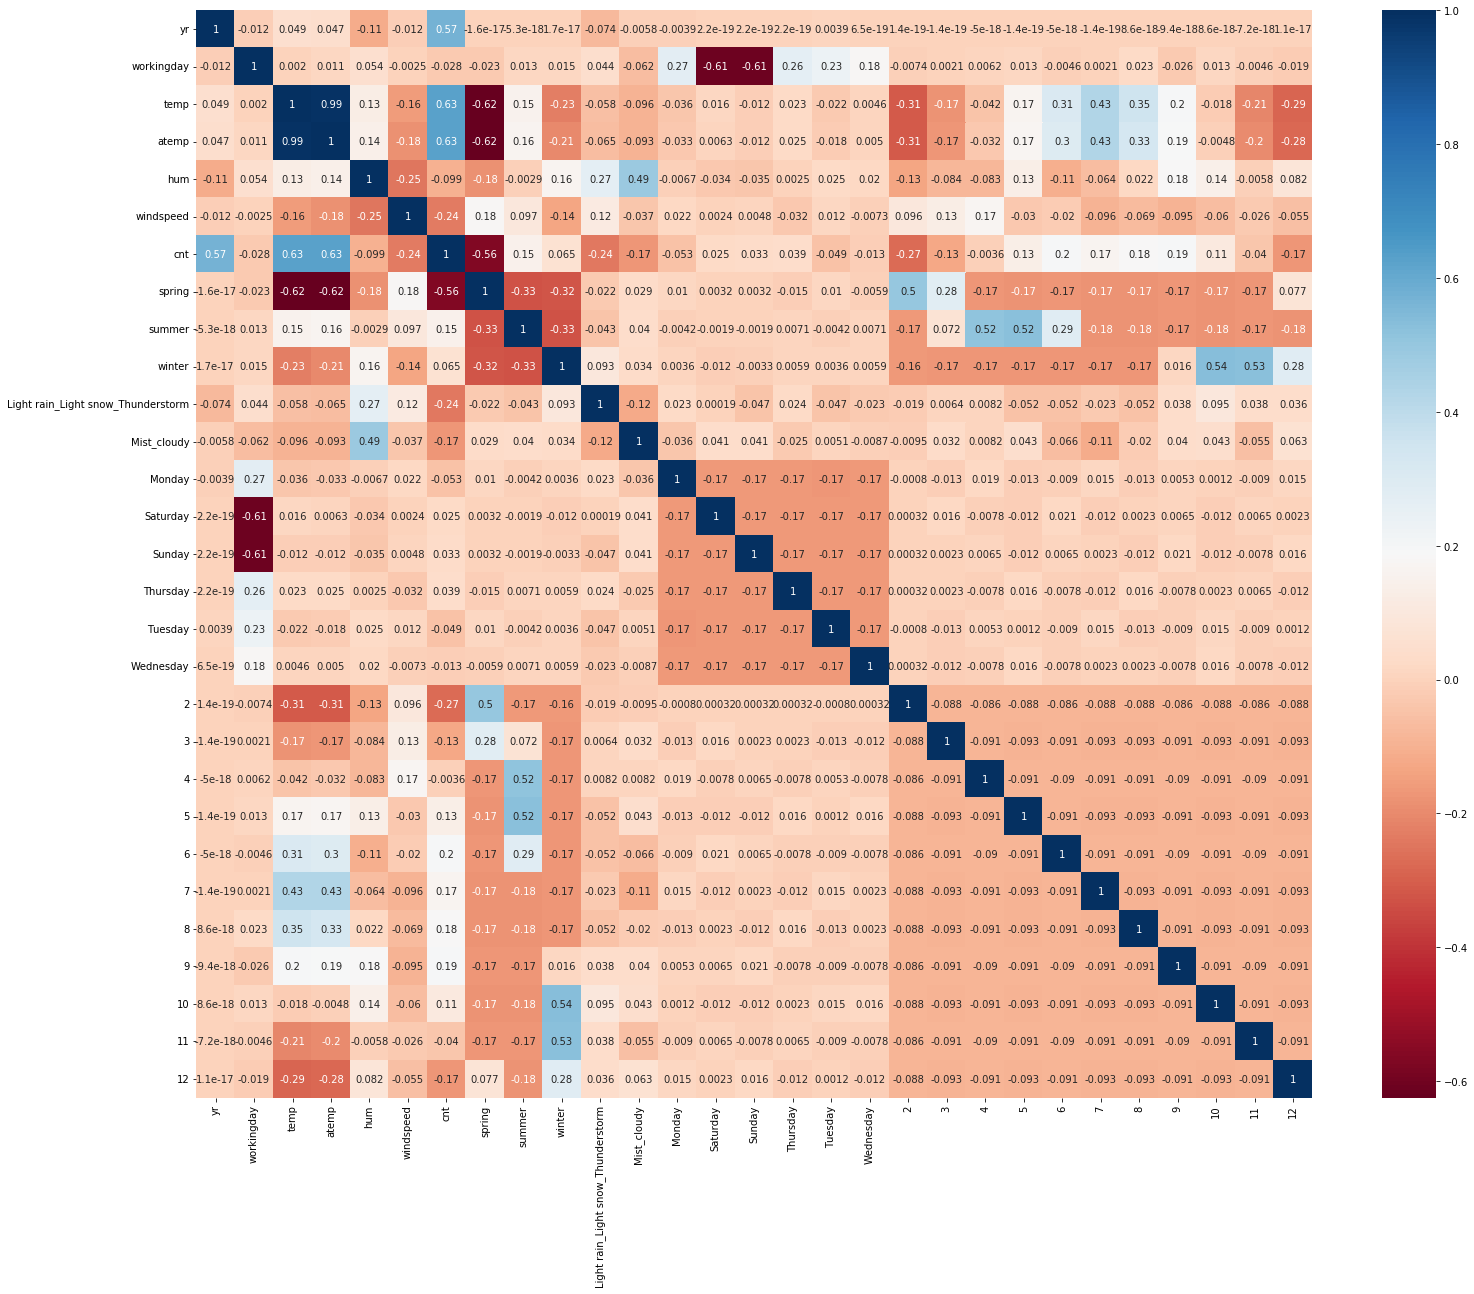

In [124]:
plt.figure(figsize = (25,20))
sns.heatmap(bikesharingdata.corr(), annot = True, cmap="RdBu")
plt.show()

In [125]:
bikesharingdata.shape

(730, 29)

### Step 4: Splitting the Data into Training and Test Data

In [126]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikesharingdata_train, bikesharingdata_test = train_test_split(bikesharingdata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [127]:
## Inspecting the training and test data shapes
bikesharingdata_test.shape

(219, 29)

In [128]:
bikesharingdata_train.shape

(510, 29)

#### Rescaling the features

In [ ]:
### Will use the minmaxscaling

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [130]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']
bikesharingdata_train[numeric_vars] = scaler.fit_transform(bikesharingdata_train[numeric_vars])

In [131]:
bikesharingdata_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### Method 1. Manual Process Of Developing A Model

#### Model 1.We saw that count and temperature had a high correlation. Lets start with that.

In [132]:
y_train = bikesharingdata_train.pop('cnt')
X_train = bikesharingdata_train

In [ ]:
## LEts fit a regression line using statsmodels

In [133]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [134]:
## Check the parameters
lr_1.params

const    0.169798
temp     0.639952
dtype: float64

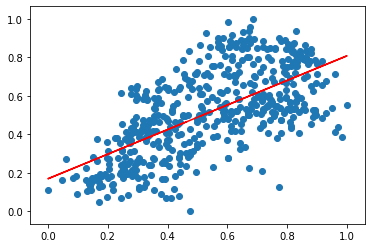

In [135]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [137]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 30 May 2023   Prob (F-statistic):           5.80e-61
Time:                        16:22:33   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

#### Model 2. R-Squared is around 0.414. We can do better than this. Lets try to add the year variable

In [138]:
X_train_lm = X_train[['temp', 'yr']]

In [139]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [140]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Tue, 30 May 2023   Prob (F-statistic):          9.25e-130
Time:                        16:22:40   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-Squared has improved to 0.69. The coefficients are also significant.
#### Model 3. We can do better than this. Lets try to add the atemp variable

In [141]:
X_train_lm = X_train[['temp','atemp', 'yr']]

In [142]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const    0.072352
temp     0.076265
atemp    0.545027
yr       0.237672
dtype: float64

In [143]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.62e-130
Time:                        16:22:48   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.000       0.043       0.102
temp           0.0763      0.169      0.451      0.652      -0.256       0.408
atemp          0.5450      0.180      3.032      0.003       0.192       0.898
yr             0.2377      0.011     21.471      0.000       0.216       0.259
==============================================================================
Omnibus:                       37.600   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.841
Skew:                          -0.544   Prob(JB):                     7.49e-13
Kurtosis:                       4.201   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R-Squared hasnt changed. Also, the P-Value of temp has increased. making it insignificant. There is some relation between temp and atemp. We can ignore the atemp for now. Lets add another variable with a higher correlation
### Model 4. Adding spring to the model.

In [144]:
X_train_lm = X_train[['temp','spring', 'yr']]

In [145]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const     0.202479
temp      0.416707
spring   -0.144075
yr        0.240802
dtype: float64

In [146]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     475.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          8.50e-147
Time:                        16:22:56   Log-Likelihood:                 380.27
No. Observations:                 510   AIC:                            -752.5
Df Residuals:                     506   BIC:                            -735.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2025      0.019     10.795      0.000       0.166       0.239
temp           0.4167      0.029     14.570      0.000       0.361       0.473
spring        -0.1441      0.015     -9.627      0.000      -0.173      -0.115
yr             0.2408      0.010     23.437      0.000       0.221       0.261
==============================================================================
Omnibus:                      101.940   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.940
Skew:                          -0.976   Prob(JB):                     1.20e-60
Kurtosis:                       6.029   Cond. No.                         8.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Spring variable seems to be a good predictor variable. IT has a low p-value and the R-Squared has increased to 0.737 overall
### Model 5. Add windspeed to the model

In [147]:
X_train_lm = X_train[['temp','spring','windspeed', 'yr']]

In [148]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const        0.264318
temp         0.400463
spring      -0.136882
windspeed   -0.172524
yr           0.241748
dtype: float64

In [149]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     388.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.86e-152
Time:                        16:23:03   Log-Likelihood:                 396.65
No. Observations:                 510   AIC:                            -783.3
Df Residuals:                     505   BIC:                            -762.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2643      0.021     12.534      0.000       0.223       0.306
temp           0.4005      0.028     14.371      0.000       0.346       0.455
spring        -0.1369      0.015     -9.401      0.000      -0.165      -0.108
windspeed     -0.1725      0.030     -5.789      0.000      -0.231      -0.114
yr             0.2417      0.010     24.270      0.000       0.222       0.261
==============================================================================
Omnibus:                       84.617   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.749
Skew:                          -0.865   Prob(JB):                     1.15e-43
Kurtosis:                       5.512   Cond. No.                         9.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R-squared value only increased marginally from 0.737 to 0.753
### Model 6. Lets try to add the variable 'Light rain_Light snow_Thunderstorm' to the model


In [150]:
X_train_lm = X_train[['temp','spring','windspeed','Light rain_Light snow_Thunderstorm',
'yr']]

In [151]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const                                 0.277192
temp                                  0.385735
spring                               -0.147633
windspeed                            -0.150239
Light rain_Light snow_Thunderstorm   -0.243284
yr                                    0.237138
dtype: float64

In [59]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     373.4
Date:                Tue, 30 May 2023   Prob (F-statistic):          7.31e-167
Time:                        16:04:07   Log-Likelihood:                 433.36
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     504   BIC:                            -829.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2772      0.020     14.073      0.000       0.238       0.316
temp                                   0.3857      0.026     14.831      0.000       0.335       0.437
spring                                -0.1476      0.014    -10.842      0.000      -0.174      -0.121
windspeed                             -0.1502      0.028     -5.390      0.000      -0.205      -0.095
Light rain_Light snow_Thunderstorm    -0.2433      0.028     -8.834      0.000      -0.297      -0.189
yr                                     0.2371      0.009     25.519      0.000       0.219       0.255
==============================================================================
Omnibus:                       52.857   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.345
Skew:                          -0.635   Prob(JB):                     7.28e-22
Kurtosis:                       4.723   Cond. No.                         9.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R-squared has increased to 0.787
### Model 7. Add another variable 'Mist_Cloudy'

In [152]:
X_train_lm = X_train[['temp','spring','windspeed','Light rain_Light snow_Thunderstorm','Mist_cloudy',
'yr']]

In [153]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

const                                 0.320383
temp                                  0.362729
spring                               -0.153830
windspeed                            -0.157135
Light rain_Light snow_Thunderstorm   -0.271313
Mist_cloudy                          -0.075476
yr                                    0.236372
dtype: float64

In [154]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.81e-179
Time:                        16:23:17   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3204      0.019     16.619      0.000       0.283       0.358
temp                                   0.3627      0.025     14.724      0.000       0.314       0.411
spring                                -0.1538      0.013    -11.985      0.000      -0.179      -0.129
windspeed                             -0.1571      0.026     -5.988      0.000      -0.209      -0.106
Light rain_Light snow_Thunderstorm    -0.2713      0.026    -10.379      0.000      -0.323      -0.220
Mist_cloudy                           -0.0755      0.009     -8.140      0.000      -0.094      -0.057
yr                                     0.2364      0.009     27.031      0.000       0.219       0.254
==============================================================================
Omnibus:                       58.243   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.829
Skew:                          -0.596   Prob(JB):                     1.59e-31
Kurtosis:                       5.292   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R-squared value has increased to 0.81. Lets see if we can improve the model further.
#### Model 8. Add the variable 'summer'

In [155]:
X_train_lm = X_train[['temp','spring','windspeed','Light rain_Light snow_Thunderstorm','Mist_cloudy',
'yr','summer']]

In [156]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.params

const                                 0.321030
temp                                  0.362336
spring                               -0.154748
windspeed                            -0.156155
Light rain_Light snow_Thunderstorm   -0.271751
Mist_cloudy                          -0.075411
yr                                    0.236381
summer                               -0.002205
dtype: float64

In [157]:
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     310.1
Date:                Tue, 30 May 2023   Prob (F-statistic):          9.36e-178
Time:                        16:23:26   Log-Likelihood:                 464.93
No. Observations:                 510   AIC:                            -913.9
Df Residuals:                     502   BIC:                            -880.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3210      0.020     16.413      0.000       0.283       0.359
temp                                   0.3623      0.025     14.648      0.000       0.314       0.411
spring                                -0.1547      0.014    -11.355      0.000      -0.182      -0.128
windspeed                             -0.1562      0.027     -5.846      0.000      -0.209      -0.104
Light rain_Light snow_Thunderstorm    -0.2718      0.026    -10.350      0.000      -0.323      -0.220
Mist_cloudy                           -0.0754      0.009     -8.121      0.000      -0.094      -0.057
yr                                     0.2364      0.009     27.006      0.000       0.219       0.254
summer                                -0.0022      0.011     -0.202      0.840      -0.024       0.019
==============================================================================
Omnibus:                       58.697   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.429
Skew:                          -0.600   Prob(JB):                     7.16e-32
Kurtosis:                       5.305   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The summer variable seems to be insignificant

### We seem to have arrived at a decent model with a high R-squared value of 0.8

In [158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_lm = X_train[['temp','spring','windspeed','Light rain_Light snow_Thunderstorm','Mist_cloudy',
'yr']]
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.68
0,temp,3.52
5,yr,2.02
1,spring,1.51
4,Mist_cloudy,1.45
3,Light rain_Light snow_Thunderstorm,1.06


### Most of the VIFs seem to be in an acceptable range

In [143]:
## LEts take the model without the summer as our final model

In [160]:
X_train_lm = X_train[['temp','spring','windspeed','Light rain_Light snow_Thunderstorm','Mist_cloudy',
'yr']]

### Residual analysis on the train data
#### The error terms seem to be normally distributed

In [161]:
X_train_lm = sm.add_constant(X_train_lm)

y_train_cnt = lr_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

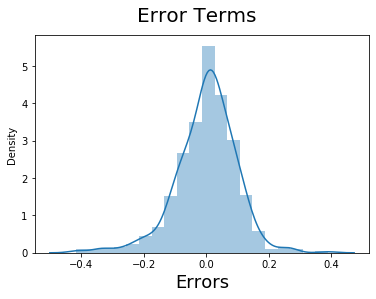

In [176]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

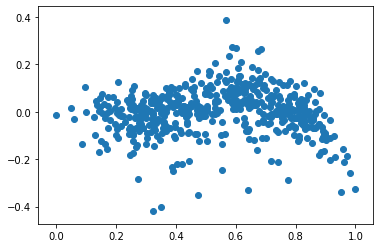

In [177]:
### Checking if there is a pattern in error terms. There doesnt seem to be any pattern in the error terms
plt.scatter(X_train_lm.iloc[:, 1], (y_train-y_train_cnt))

### Making Predictions using the final model - (MEthod 1: Manual way of modeling) - 7th model

In [ ]:
## Applying the scaler on the test sets

In [163]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']
bikesharingdata_test[numeric_vars] = scaler.transform(bikesharingdata_test[numeric_vars])

In [164]:
bikesharingdata_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


##### Dividing into X_test and y_test

In [165]:
y_test = bikesharingdata_test.pop('cnt')
X_test = bikesharingdata_test

In [166]:
y_test.shape

(219,)

In [167]:
X_test.shape

(219, 28)

In [168]:
X_test_manual =X_test[['temp','spring','windspeed','Light rain_Light snow_Thunderstorm','Mist_cloudy',
'yr']]

In [169]:
X_test_manual.shape

(219, 6)

In [170]:
X_test_manual = sm.add_constant(X_test_manual)

In [171]:
X_test_manual.shape

(219, 7)

In [172]:
# Making predictions using the final model (in 7th iteration)

y_pred_manual = lr_7.predict(X_test_manual)

Text(0, 0.5, 'y_pred')

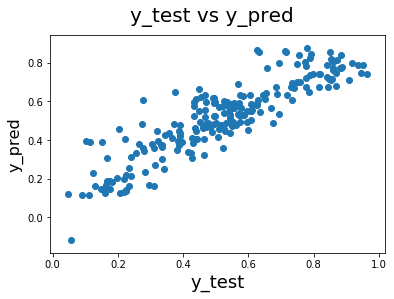

In [173]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_manual)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [174]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.81e-179
Time:                        16:24:10   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3204      0.019     16.619      0.000       0.283       0.358
temp                                   0.3627      0.025     14.724      0.000       0.314       0.411
spring                                -0.1538      0.013    -11.985      0.000      -0.179      -0.129
windspeed                             -0.1571      0.026     -5.988      0.000      -0.209      -0.106
Light rain_Light snow_Thunderstorm    -0.2713      0.026    -10.379      0.000      -0.323      -0.220
Mist_cloudy                           -0.0755      0.009     -8.140      0.000      -0.094      -0.057
yr                                     0.2364      0.009     27.031      0.000       0.219       0.254
==============================================================================
Omnibus:                       58.243   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.829
Skew:                          -0.596   Prob(JB):                     1.59e-31
Kurtosis:                       5.292   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


We can see that the equation of our best fitted line is:

$ Count = 0.32 + 0.36 \times  temp - 0.15  \times  spring -0.157 \times windspeed - 0.27 \times Light rain\_Light snow\_Thunderstorm - 0.075 \times Mist\_cloudy + 0.23 \times yr $


### Checking the R-Squared score on the test set

In [175]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_manual)

0.7922034556420758

### R-Square on the test set is also 0.79 . The model seems to be decent enough as the R-square for the manually built model is 0.81

## Method 2: Model selection using RFE

In [178]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikesharingdata_rfe_train, bikesharingdata_rfe_test = train_test_split(bikesharingdata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [180]:
bikesharingdata_rfe_test.shape

(219, 29)

In [181]:
bikesharingdata_rfe_train.shape

(510, 29)

### Scaling the features

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [183]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']
bikesharingdata_rfe_train[numeric_vars] = scaler.fit_transform(bikesharingdata_rfe_train[numeric_vars])

In [184]:
bikesharingdata_rfe_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for model building


In [185]:
y_train = bikesharingdata_rfe_train.pop('cnt')
X_train = bikesharingdata_rfe_train

### RFE - recursive feature elimination

In [186]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [187]:
# Running RFE with the output number of the variable equal to 15
lm_rfe = LinearRegression()
lm_rfe.fit(X_train, y_train)

rfe = RFE(lm_rfe, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 13),
 (2, False, 9),
 (3, False, 3),
 (4, False, 5),
 (5, False, 4),
 (6, False, 6),
 (7, False, 10),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 12),
 (12, False, 11)]

In [189]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                               'workingday',
                                     'temp',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          8,
                                          9,
                                         10],
      dtype='object')

### Building a model using statsmodels

In [190]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [191]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe)

In [192]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [193]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.46e-187
Time:                        16:27:02   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     494   BIC:                            -921.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### atemp seems to be insignificant. LEts check the VIF values as well

In [194]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif0 = pd.DataFrame()
X = X_train_rfe
vif0['Features'] = X.columns
vif0['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif0['VIF'] = round(vif0['VIF'], 2)
vif0 = vif0.sort_values(by = "VIF", ascending = False)
vif0

,Features,VIF
3,atemp,371.30
2,temp,367.68
4,hum,26.04
1,workingday,17.62
5,windspeed,4.66
11,Sunday,4.11
10,Saturday,3.92
7,winter,2.30
9,Mist_cloudy,2.24
0,yr,2.04


### atemp is insignificant and the VIF value is quite high. Can be dropped

In [195]:
X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)

In [196]:
X_train_rfe.columns

Index([                                'yr',
                               'workingday',
                                     'temp',
                                      'hum',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          8,
                                          9,
                                         10],
      dtype='object')

##### Rebuilding the model without atemp

In [197]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [198]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [199]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.06e-188
Time:                        16:27:42   Log-Likelihood:                 510.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### The p-values seem to be less and the coefficients seem to be significant. The R-value is also 0.84

### Calculating the VIFs for further model simplification

In [200]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()
X = X_train_rfe
vif1['Features'] = X.columns
vif1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
3,hum,25.86
1,workingday,17.52
2,temp,10.39
4,windspeed,4.47
10,Sunday,4.09
9,Saturday,3.92
6,winter,2.28
8,Mist_cloudy,2.24
0,yr,2.04
5,summer,1.83


In [ ]:
### LEts drop humidity day as it has a high VIF

In [ ]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [ ]:
import statsmodels.api as sm  
X_train_new1 = sm.add_constant(X_train_rfe)

In [203]:
lm_2 = sm.OLS(y_train,X_train_new1).fit()   # Running the linear model

In [205]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.22e-185
Time:                        16:28:31   Log-Likelihood:                 500.11
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     496   BIC:                            -912.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0422      0.032      1.334      0.183      -0.020       0.104
yr                                     0.2335      0.008     28.396      0.000       0.217       0.250
workingday                             0.0886      0.028      3.128      0.002       0.033       0.144
temp                                   0.5082      0.022     22.781      0.000       0.464       0.552
windspeed                             -0.1546      0.025     -6.161      0.000      -0.204      -0.105
summer                                 0.1026      0.011      9.224      0.000       0.081       0.124
winter                                 0.1251      0.012     10.241      0.000       0.101       0.149
Light rain_Light snow_Thunderstorm    -0.2873      0.025    -11.544      0.000      -0.336      -0.238
Mist_cloudy                           -0.0844      0.009     -9.552      0.000      -0.102      -0.067
Saturday                               0.1043      0.030      3.458      0.001       0.045       0.164
Sunday                                 0.1126      0.030      3.751      0.000       0.054       0.172
8                                      0.0573      0.017      3.437      0.001       0.025       0.090
9                                      0.1213      0.017      7.287      0.000       0.089       0.154
10                                     0.0369      0.018      2.086      0.037       0.002       0.072
==============================================================================
Omnibus:                       71.652   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.375
Skew:                          -0.760   Prob(JB):                     4.07e-35
Kurtosis:                       5.267   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets check the VIF values now

In [206]:
vif2 = pd.DataFrame()
X = X_train_rfe
vif2['Features'] = X.columns
vif2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
1,workingday,9.74
2,temp,9.04
3,windspeed,4.46
9,Sunday,2.75
8,Saturday,2.62
5,winter,2.17
0,yr,2.04
4,summer,1.82
12,10,1.62
10,8,1.60


### Workingday seems to have a high VIF. Lets remove it

In [207]:
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)

In [208]:
import statsmodels.api as sm  
X_train_new2 = sm.add_constant(X_train_rfe)

In [209]:
lm_3 = sm.OLS(y_train,X_train_new2).fit()   # Running the linear model

In [210]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.88e-184
Time:                        16:28:56   Log-Likelihood:                 495.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     497   BIC:                            -909.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1261      0.017      7.418      0.000       0.093       0.159
yr                                     0.2330      0.008     28.101      0.000       0.217       0.249
temp                                   0.5111      0.022     22.735      0.000       0.467       0.555
windspeed                             -0.1547      0.025     -6.111      0.000      -0.204      -0.105
summer                                 0.1042      0.011      9.301      0.000       0.082       0.126
winter                                 0.1262      0.012     10.239      0.000       0.102       0.150
Light rain_Light snow_Thunderstorm    -0.2847      0.025    -11.344      0.000      -0.334      -0.235
Mist_cloudy                           -0.0837      0.009     -9.401      0.000      -0.101      -0.066
Saturday                               0.0182      0.012      1.464      0.144      -0.006       0.043
Sunday                                 0.0266      0.012      2.189      0.029       0.003       0.050
8                                      0.0590      0.017      3.507      0.000       0.026       0.092
9                                      0.1186      0.017      7.071      0.000       0.086       0.152
10                                     0.0362      0.018      2.029      0.043       0.001       0.071
==============================================================================
Omnibus:                       77.354   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.136
Skew:                          -0.799   Prob(JB):                     1.26e-39
Kurtosis:                       5.424   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Saturday seems to have a high p-value. Lets re-check the VIFs

In [211]:
vif3 = pd.DataFrame()
X = X_train_rfe
vif3['Features'] = X.columns
vif3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,Features,VIF
1,temp,5.23
2,windspeed,3.12
0,yr,2.00
4,winter,1.94
3,summer,1.82
11,10,1.60
9,8,1.59
6,Mist_cloudy,1.51
10,9,1.33
8,Sunday,1.19


### p-value for Saturday seems to be high. Lets remove it

In [212]:
X_train_rfe = X_train_rfe.drop(["Saturday"], axis = 1)

In [213]:
import statsmodels.api as sm  
X_train_new3 = sm.add_constant(X_train_rfe)

In [214]:
lm_4 = sm.OLS(y_train,X_train_new3).fit()   # Running the linear model

In [215]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 30 May 2023   Prob (F-statistic):          3.55e-185
Time:                        16:29:18   Log-Likelihood:                 494.04
No. Observations:                 510   AIC:                            -964.1
Df Residuals:                     498   BIC:                            -913.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1286      0.017      7.594      0.000       0.095       0.162
yr                                     0.2328      0.008     28.049      0.000       0.217       0.249
temp                                   0.5116      0.023     22.734      0.000       0.467       0.556
windspeed                             -0.1550      0.025     -6.118      0.000      -0.205      -0.105
summer                                 0.1041      0.011      9.279      0.000       0.082       0.126
winter                                 0.1259      0.012     10.207      0.000       0.102       0.150
Light rain_Light snow_Thunderstorm    -0.2832      0.025    -11.280      0.000      -0.332      -0.234
Mist_cloudy                           -0.0831      0.009     -9.333      0.000      -0.101      -0.066
Sunday                                 0.0238      0.012      1.982      0.048       0.000       0.047
8                                      0.0594      0.017      3.530      0.000       0.026       0.093
9                                      0.1187      0.017      7.072      0.000       0.086       0.152
10                                     0.0359      0.018      2.010      0.045       0.001       0.071
==============================================================================
Omnibus:                       76.146   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.943
Skew:                          -0.782   Prob(JB):                     1.39e-39
Kurtosis:                       5.444   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Removing the Sunday column due to high p-value
X_train_rfe = X_train_rfe.drop(["Sunday"], axis = 1)

In [221]:
import statsmodels.api as sm  
X_train_new4 = sm.add_constant(X_train_rfe)

In [222]:
lm_5 = sm.OLS(y_train,X_train_new4).fit()   # Running the linear model

In [223]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.55e-185
Time:                        16:30:46   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1310      0.017      7.733      0.000       0.098       0.164
yr                                     0.2331      0.008     27.999      0.000       0.217       0.249
temp                                   0.5124      0.023     22.706      0.000       0.468       0.557
windspeed                             -0.1538      0.025     -6.055      0.000      -0.204      -0.104
summer                                 0.1033      0.011      9.184      0.000       0.081       0.125
winter                                 0.1252      0.012     10.124      0.000       0.101       0.149
Light rain_Light snow_Thunderstorm    -0.2843      0.025    -11.297      0.000      -0.334      -0.235
Mist_cloudy                           -0.0818      0.009     -9.185      0.000      -0.099      -0.064
8                                      0.0589      0.017      3.487      0.001       0.026       0.092
9                                      0.1185      0.017      7.039      0.000       0.085       0.152
10                                     0.0357      0.018      1.992      0.047       0.000       0.071
==============================================================================
Omnibus:                       71.295   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.083
Skew:                          -0.725   Prob(JB):                     2.60e-38
Kurtosis:                       5.458   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
vif5 = pd.DataFrame()
X = X_train_rfe
vif5['Features'] = X.columns
vif5['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif5['VIF'] = round(vif5['VIF'], 2)
vif5 = vif5.sort_values(by = "VIF", ascending = False)
vif5

,Features,VIF
1,temp,5.11
2,windspeed,3.09
0,yr,2.00
4,winter,1.94
3,summer,1.82
9,10,1.60
7,8,1.59
6,Mist_cloudy,1.48
8,9,1.33
5,Light rain_Light snow_Thunderstorm,1.09


In [295]:
### Dropping column 10 as it has a high p-value

In [225]:
X_train_rfe = X_train_rfe.drop([10], axis = 1)

In [226]:
import statsmodels.api as sm  
X_train_new5 = sm.add_constant(X_train_rfe)

In [227]:
lm_6 = sm.OLS(y_train,X_train_new5).fit()   # Running the linear model

In [228]:
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          6.57e-186
Time:                        16:31:28   Log-Likelihood:                 490.01
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     500   BIC:                            -917.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1264      0.017      7.511      0.000       0.093       0.160
yr                                     0.2328      0.008     27.886      0.000       0.216       0.249
temp                                   0.5211      0.022     23.460      0.000       0.477       0.565
windspeed                             -0.1516      0.025     -5.954      0.000      -0.202      -0.102
summer                                 0.1016      0.011      9.038      0.000       0.080       0.124
winter                                 0.1374      0.011     12.758      0.000       0.116       0.159
Light rain_Light snow_Thunderstorm    -0.2786      0.025    -11.109      0.000      -0.328      -0.229
Mist_cloudy                           -0.0809      0.009     -9.069      0.000      -0.098      -0.063
8                                      0.0557      0.017      3.304      0.001       0.023       0.089
9                                      0.1133      0.017      6.791      0.000       0.081       0.146
==============================================================================
Omnibus:                       64.857   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.244
Skew:                          -0.676   Prob(JB):                     1.44e-33
Kurtosis:                       5.300   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Lets check the VIFs

In [229]:
vif6 = pd.DataFrame()
X = X_train_rfe
vif6['Features'] = X.columns
vif6['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif6['VIF'] = round(vif6['VIF'], 2)
vif6 = vif6.sort_values(by = "VIF", ascending = False)
vif6

,Features,VIF
1,temp,5.01
2,windspeed,3.08
0,yr,2.00
3,summer,1.81
7,8,1.58
4,winter,1.48
6,Mist_cloudy,1.48
8,9,1.30
5,Light rain_Light snow_Thunderstorm,1.08


### Residual Analysis of the training data

Text(0.5, 0, 'Errors')

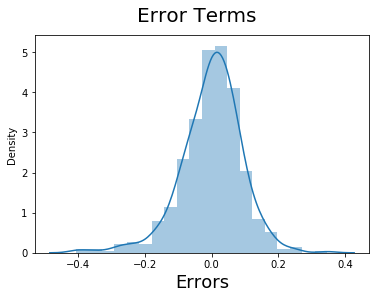

In [244]:

y_train_cnt = lm_6.predict(X_train_new5)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions using the final model - (MEthod 1: RFE way of modeling) - 6th model

In [149]:
## Applying the scaler on the test sets

In [231]:
numeric_vars=['temp','atemp','hum','windspeed','cnt']

bikesharingdata_rfe_test[numeric_vars] = scaler.transform(bikesharingdata_rfe_test[numeric_vars])

In [232]:
bikesharingdata_rfe_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


##### Dividing into X_test and y_test

In [233]:
y_test = bikesharingdata_rfe_test.pop('cnt')
X_test = bikesharingdata_rfe_test

In [234]:
y_test.shape

(219,)

In [235]:
X_test.shape

(219, 28)

In [236]:
X_test_rfe =X_test[X_train_rfe.columns]

In [237]:
X_test_rfe.shape

(219, 9)

In [238]:
X_test_rfe = sm.add_constant(X_test_rfe)


In [239]:
X_test_rfe.shape

(219, 10)

In [240]:
# Making predictions using the final model (in 7th iteration)

y_pred_rfe = lm_6.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

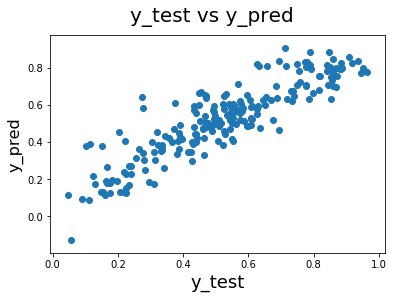

In [241]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [242]:
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.8
Date:                Tue, 30 May 2023   Prob (F-statistic):          6.57e-186
Time:                        16:32:14   Log-Likelihood:                 490.01
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     500   BIC:                            -917.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1264      0.017      7.511      0.000       0.093       0.160
yr                                     0.2328      0.008     27.886      0.000       0.216       0.249
temp                                   0.5211      0.022     23.460      0.000       0.477       0.565
windspeed                             -0.1516      0.025     -5.954      0.000      -0.202      -0.102
summer                                 0.1016      0.011      9.038      0.000       0.080       0.124
winter                                 0.1374      0.011     12.758      0.000       0.116       0.159
Light rain_Light snow_Thunderstorm    -0.2786      0.025    -11.109      0.000      -0.328      -0.229
Mist_cloudy                           -0.0809      0.009     -9.069      0.000      -0.098      -0.063
8                                      0.0557      0.017      3.304      0.001       0.023       0.089
9                                      0.1133      0.017      6.791      0.000       0.081       0.146
==============================================================================
Omnibus:                       64.857   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.244
Skew:                          -0.676   Prob(JB):                     1.44e-33
Kurtosis:                       5.300   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


We can see that the equation of our best fitted line is:

$ Count = 0.12 + 0.52 \times  temp + 0.1  \times  summer + 0.13  \times  winter  -0.15 \times windspeed - 0.27 \times Light rain\_Light snow\_Thunderstorm - 0.08 \times Mist\_cloudy + 0.23 \times yr + 0.06 \times Month 8 + 0.11 \times Month 9 $


### Checking the R-Squared score on the test set

In [243]:
r2_score(y_test, y_pred_rfe)

0.7909416676310566

### R-Square on the test set is also 0.79 . The model seems to be decent enough as the R-square on the training set was 0.827